In [36]:
import os
import glob
import itertools
import string
from os import path
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

import nltk
from nltk.corpus import stopwords
import textract
from sklearn.feature_extraction.text import TfidfVectorizer
import stylecloud

# Utils

In [39]:
def freq_dist_to_csv(fd, name):
    df = pd.DataFrame(fd.most_common())
    df.columns = ["word", "freq"]
    df.to_csv(path.join("processed", name + ".csv"))

In [32]:
stop_words = set()
stop_words = stop_words.union(set(stopwords.words('english')))
stop_words = stop_words.union(set(string.punctuation))
stop_words = stop_words.union({str(x) for x in range(100)})

def get_tokens_from_text(text):
    for token in nltk.tokenize.word_tokenize(text):
        if token not in stop_words:
            tokens.append(token.lower())
            
    return tokens

# Processing

In [27]:
pdfs = glob.glob('./papers/*/*')
pdfs_text = {}
for pdf in pdfs:
    category = pdf.split("/")[2]
    paper_name = pdf.split("/")[3]
    pdfs_text[(category, paper_name)] = textract.process(pdf).decode("utf-8").lower()

In [33]:
tokens_by_category = defaultdict(list)

for key in pdfs_text:
    category, _ = key
    text = pdfs_text[key]
    tokens_by_category[category] += get_tokens_from_text(text)


frequencies_by_category = {}
for category in tokens_by_category:
    frequencies_by_category[category] = nltk.FreqDist(tokens_by_category[category])

In [40]:
for category in frequencies_by_category:
    freq_dist_to_csv(frequencies_by_category[category], category)

In [28]:
pdfs_text.keys()

dict_keys([('vaping', '2012_0.pdf'), ('vaping', '2016_0.pdf'), ('vaping', '2019_0.pdf'), ('vaping', '2019_1.pdf'), ('ards', '2005_0.pdf'), ('mers', '2012_0.pdf'), ('mers', '2014_1.pdf'), ('mers', '2014_0.pdf'), ('mers', '2013_1.pdf'), ('mers', '2013_0.pdf'), ('mers', '2013_2.pdf'), ('mers', '2013_3.pdf'), ('mers', '2013_4.pdf'), ('mers', '2013_5.pdf')])

In [80]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(pdfs_text.values())

In [81]:
x = X.toarray()

In [82]:
features = np.array(vectorizer.get_feature_names())

In [8]:
stop_words = set()
# stop_words = set(features[x.max(axis = 0) < 0.1])
stop_words = stop_words.union(set(stopwords.words('english')))
stop_words = stop_words.union(set(string.punctuation))
stop_words = stop_words.union({str(x) for x in range(100)})

In [10]:
tokens = []

for text in pdfs_text.values():
    for token in nltk.tokenize.word_tokenize(text):
        if token not in stop_words:
            tokens.append(token)

fd = nltk.FreqDist(tokens)

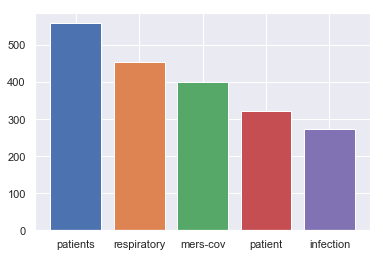

In [85]:
# fd.most_common()

for word, freq in fd.most_common()[:5]:
    plt.bar(word, freq)

In [18]:
pd

,word,freq
0,patients,559
1,respiratory,453
2,mers-cov,401
3,patient,323
4,infection,272
5,cases,244
6,case,226
7,coronavirus,222
8,2013,217
9,j,206


In [16]:
stylecloud.gen_stylecloud(pdfs_text[pdf], icon_name="fas fa-smoking")